In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display

In [13]:
X, _ = make_blobs(
    n_samples=750, n_features=10, cluster_std=0.4, random_state=0
)
X = StandardScaler().fit_transform(X)

In [14]:
df = pd.DataFrame(X)
display(df)

,0,1,2,3,4,5,6,7,8,9
0,-1.412178,0.138881,1.030354,-1.374328,1.277320,0.716573,1.352784,-0.072073,1.118122,-0.696101
1,1.120948,1.053943,-1.291701,0.250096,-0.622285,0.671510,-0.185737,0.496576,-1.357471,-0.712147
2,-1.473422,0.555454,0.518343,-1.198269,1.419566,0.741096,1.278301,0.156885,0.975500,-0.719856
3,1.148823,1.054616,-1.359783,0.234991,-0.427253,0.757168,-0.342457,1.161739,-1.378220,-0.515351
4,-0.233203,-1.327316,0.666572,1.119386,-0.706356,-1.231405,-1.040749,-0.681332,-0.040730,1.487341
...,...,...,...,...,...,...,...,...,...,...
745,1.532491,0.955039,-0.995627,0.251636,-0.703416,0.668838,-0.438386,1.397128,-1.574092,-0.722227
746,-1.313371,0.409123,1.169887,-1.131298,1.336661,0.653766,1.441933,-0.313999,1.256391,-0.665353
747,-1.460007,0.411918,1.076572,-1.169049,1.268149,0.726909,1.590668,0.275679,1.170974,-0.724211
748,-1.454470,0.153634,1.031319,-1.409967,1.515520,0.826626,1.075929,0.356608,0.912291,-0.736477


In [15]:
dbscan = DBSCAN()
clustering = dbscan.fit_predict(X)

In [24]:
np.unique(clustering)

array([-1,  0,  1,  2])

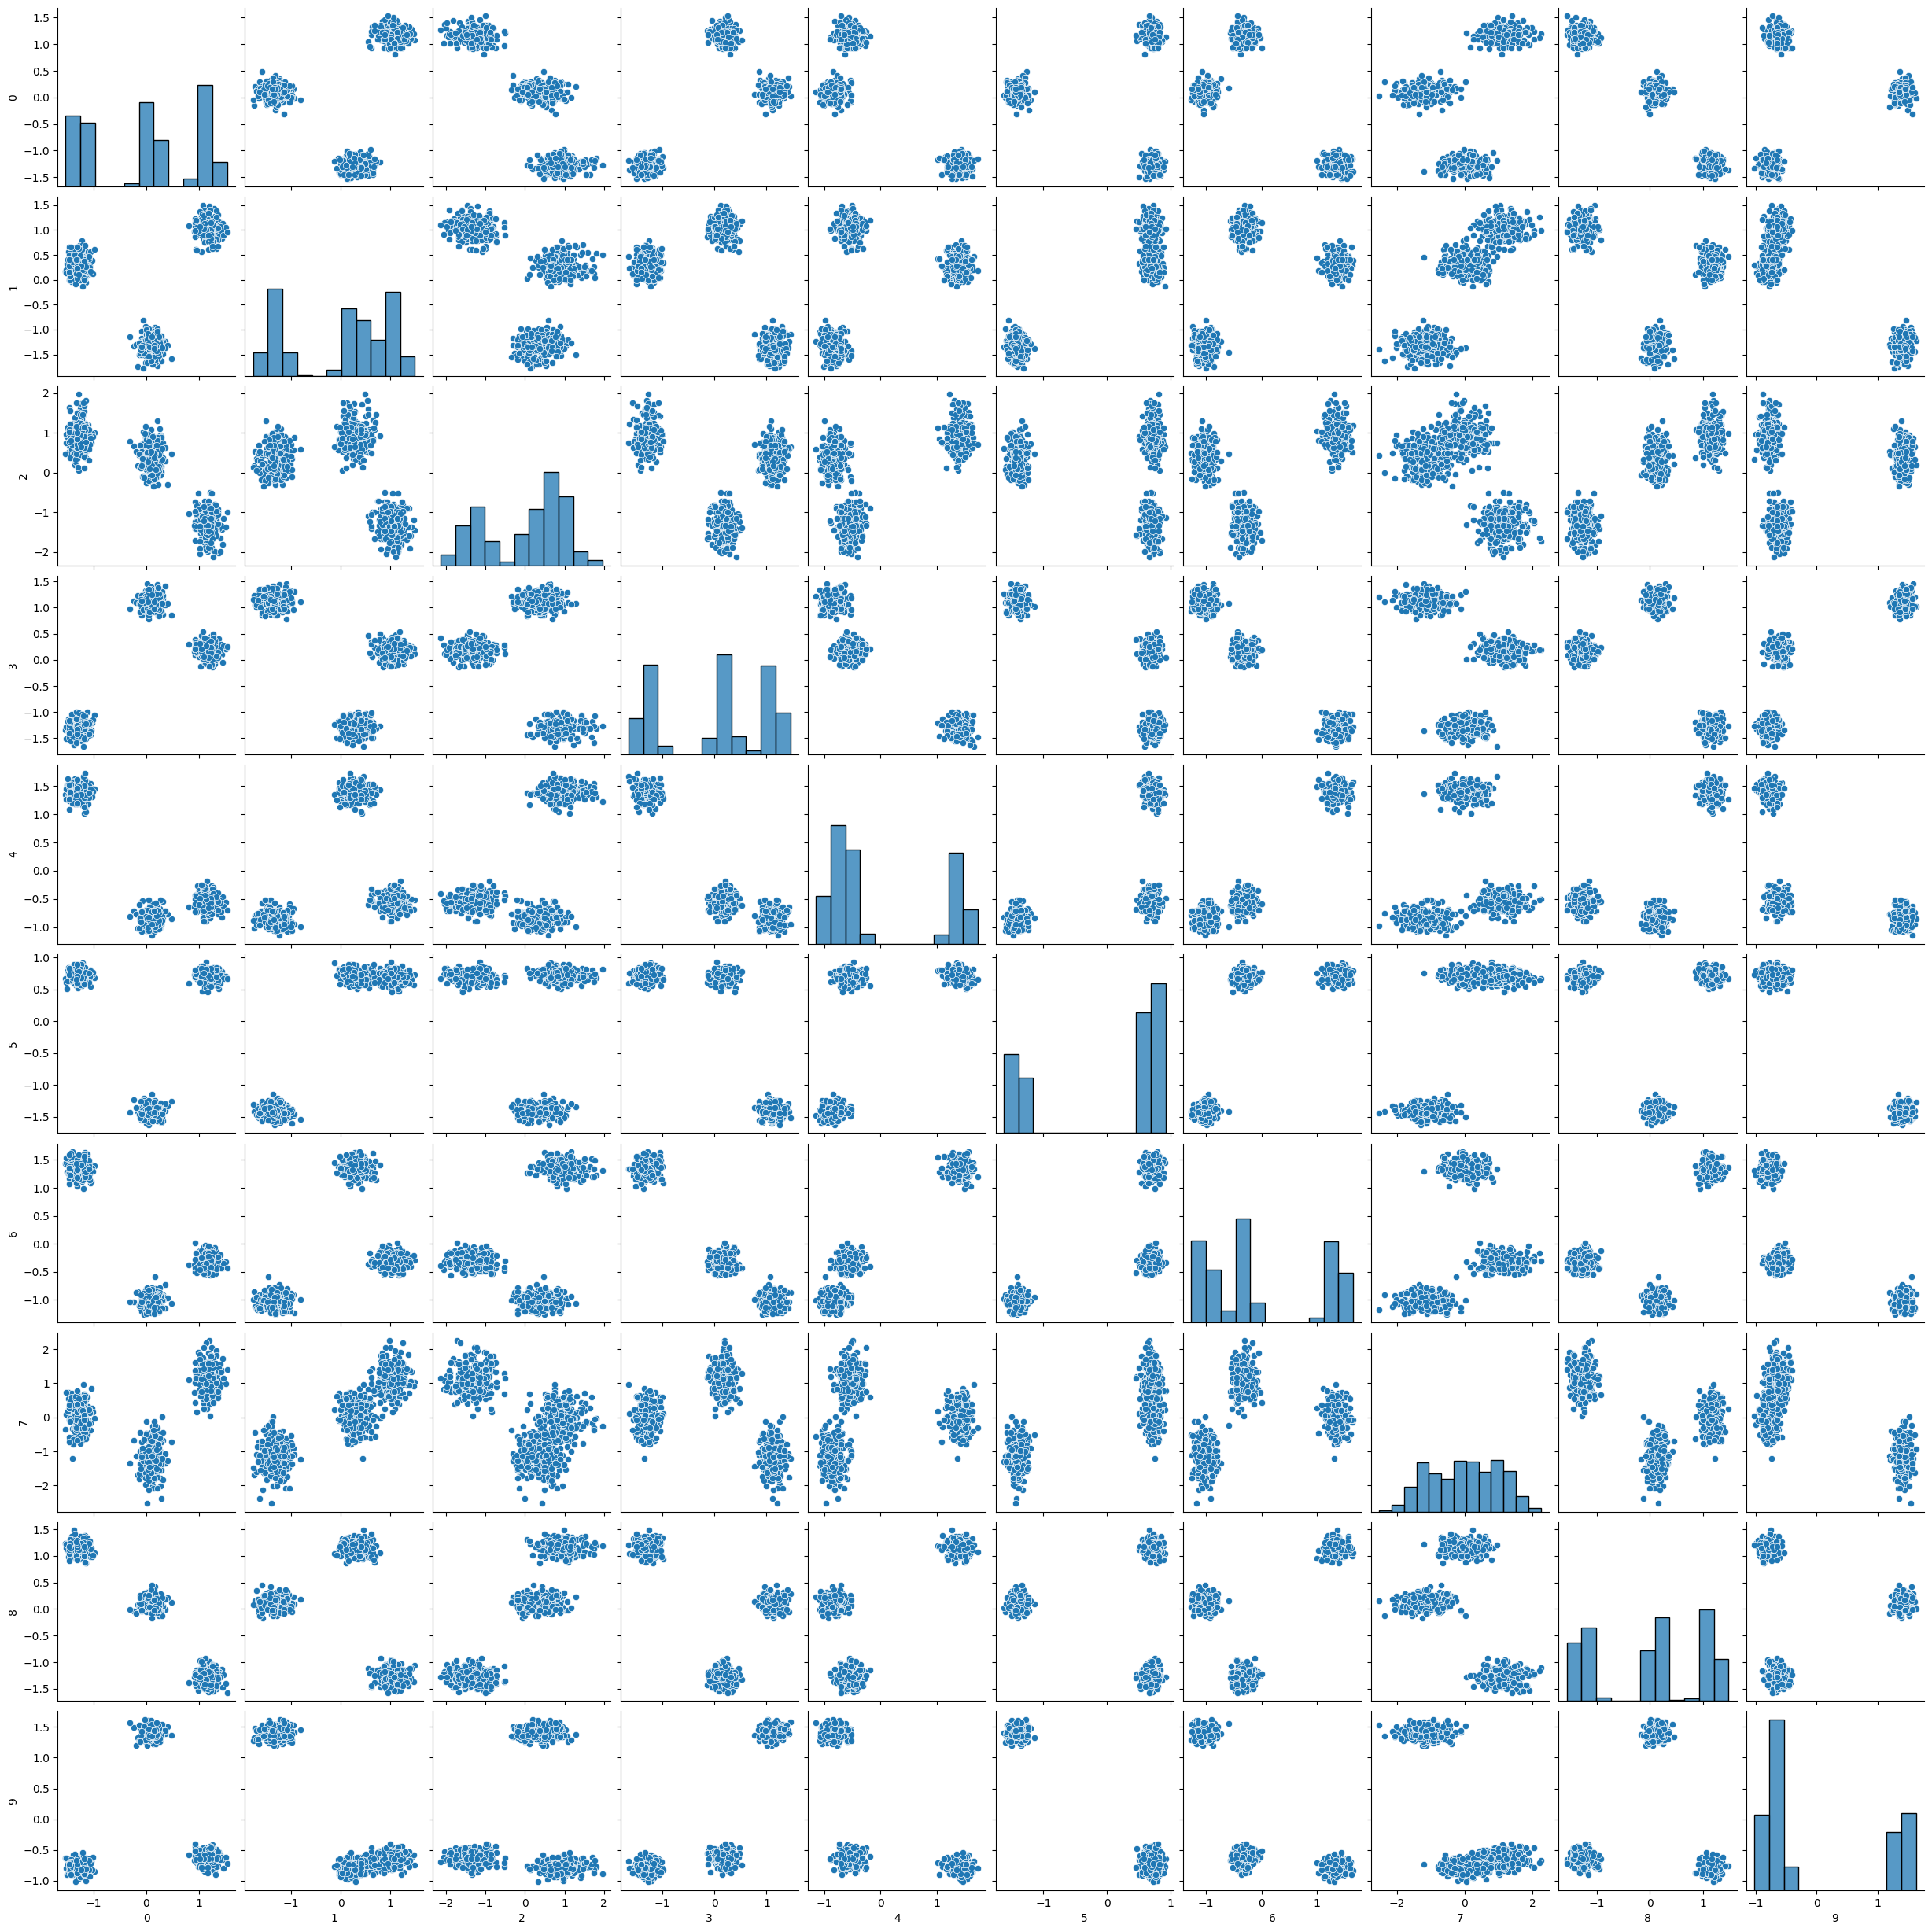

In [16]:
sns.pairplot(df)

,0,1
0,2.879354,-1.528204
1,-0.237821,2.665336
2,2.934311,-1.010308
3,-0.149849,2.941895
4,-2.541960,-1.539241
...,...,...
745,-0.335449,3.151280
746,2.846703,-1.641857
747,3.071572,-1.350743
748,2.986945,-1.256748


,0,1,clusters
0,2.879354,-1.528204,0
1,-0.237821,2.665336,1
2,2.934311,-1.010308,0
3,-0.149849,2.941895,1
4,-2.541960,-1.539241,2
...,...,...,...
745,-0.335449,3.151280,1
746,2.846703,-1.641857,0
747,3.071572,-1.350743,0
748,2.986945,-1.256748,0


<AxesSubplot: xlabel='0', ylabel='1'>

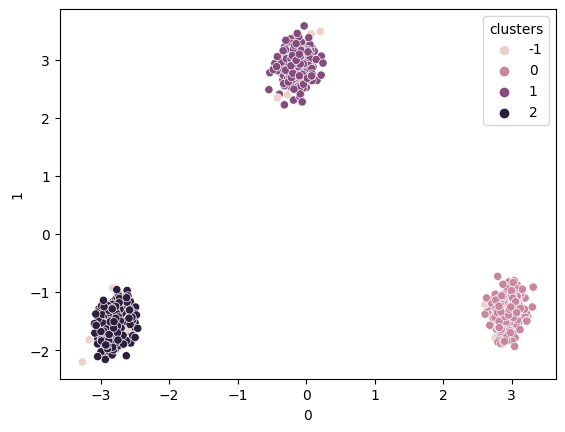

In [23]:
df_pca = pd.DataFrame(PCA(n_components=0.9).fit_transform(df))
display(df_pca)
df_with_labels = df_pca.copy()
df_with_labels["clusters"] = clustering
display(df_with_labels)
sns.scatterplot(df_with_labels, x=0, y=1, hue="clusters")

# # %%
# clustering.labels_